# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit  
from iminuit.cost import LeastSquares
import seaborn as sns

In [14]:
# Example file location
filename_example = 'data_pendulum_example/timer_output_31meas.dat'

## Data reader

In [15]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

## Read and plot the data

In [16]:
# emil_data = read_data("emil_usikkerhed.dat")
# julius_data = read_data("julius_usikkerhed.dat")
# chamilla_data = read_data("chamilla_usikkerhed.dat")
# daniel_data = read_data("daniel_usikkerhed.dat")
# sejr_data = read_data("sejr_usikkerhed.dat")

emil_data = read_data("Pendul/Data/emil.dat")
julius_data = read_data("Pendul/Data/julius.dat")
chamilla_data = read_data("Pendul/Data/chamilla.dat")
daniel_data = read_data("Pendul/Data/daniel.dat")
sejr_data = read_data("Pendul/Data/sejr.dat")

In [17]:
def linear_fit(x, alpha0, alpha1):
    return alpha0 + alpha1 * x

In [18]:
n_emil, t_emil = emil_data['n'], emil_data['t_s']
n_julius, t_julius = julius_data["n"], julius_data["t_s"]
n_daniel, t_daniel = daniel_data["n"], daniel_data["t_s"]
n_chamilla, t_chamilla = chamilla_data["n"], chamilla_data["t_s"]
n_sejr, t_sejr = sejr_data["n"], sejr_data["t_s"]

sig_emil = 0.16438811836430878     # calculate values !
sig_daniel = 0.3737078603668912
sig_julius = 0.2827376544790796
sig_sejr = 0.24341126475478317
sig_chamilla = 0.11020554312145078

sig_list = [sig_emil, sig_daniel, sig_sejr, sig_chamilla, sig_julius]

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(18, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)

ax[0,0].errorbar(n_emil, t_emil, yerr = sig_emil, color='k', fmt='o')
ax[0,0].set_xlabel('Timing measurement number', fontsize=18)
ax[0,0].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0,0].set(xlim = (0, n_emil[-1] + np.ediff1d(n_emil)[0]), ylim = (0, t_emil[-1] + np.ediff1d(t_emil)[0]))

ax[0,1].errorbar(n_daniel, t_daniel, yerr = sig_daniel, color='k', fmt='o')
ax[0,1].set_xlabel('Timing measurement number', fontsize=18)
ax[0,1].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0,1].set(xlim = (0, n_daniel[-1] + np.ediff1d(n_daniel)[0]), ylim = (0, t_daniel[-1] + np.ediff1d(t_daniel)[0]))

ax[0,2].errorbar(n_chamilla, t_chamilla, yerr = sig_chamilla, color='k', fmt='o')
ax[0,2].set_xlabel('Timing measurement number', fontsize=18)
ax[0,2].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0,2].set(xlim = (0, n_chamilla[-1] + np.ediff1d(n_chamilla)[0]), ylim = (0, t_chamilla[-1] + np.ediff1d(t_chamilla)[0]))

ax[0,3].errorbar(n_julius, t_julius, yerr = sig_julius, color='k', fmt='o')
ax[0,3].set_xlabel('Timing measurement number', fontsize=18)
ax[0,3].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0,3].set(xlim = (0, n_julius[-1] + np.ediff1d(n_julius)[0]), ylim = (0, t_julius[-1] + np.ediff1d(t_julius)[0]))

ax[0,4].errorbar(n_sejr, t_sejr, yerr = sig_sejr, color='k', fmt='o')
ax[0,4].set_xlabel('Timing measurement number', fontsize=18)
ax[0,4].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0,4].set(xlim = (0, n_sejr[-1] + np.ediff1d(n_sejr)[0]), ylim = (0, t_sejr[-1] + np.ediff1d(t_sejr)[0]))

C:\Users\juliu\AppData\Local\Temp\ipykernel_23580\632388807.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  n_list = np.array([n_emil, n_daniel, n_sejr, n_chamilla, n_julius])
C:\Users\juliu\AppData\Local\Temp\ipykernel_23580\632388807.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  t_list = np.array([t_emil, t_daniel, t_sejr, t_chamilla, t_julius])


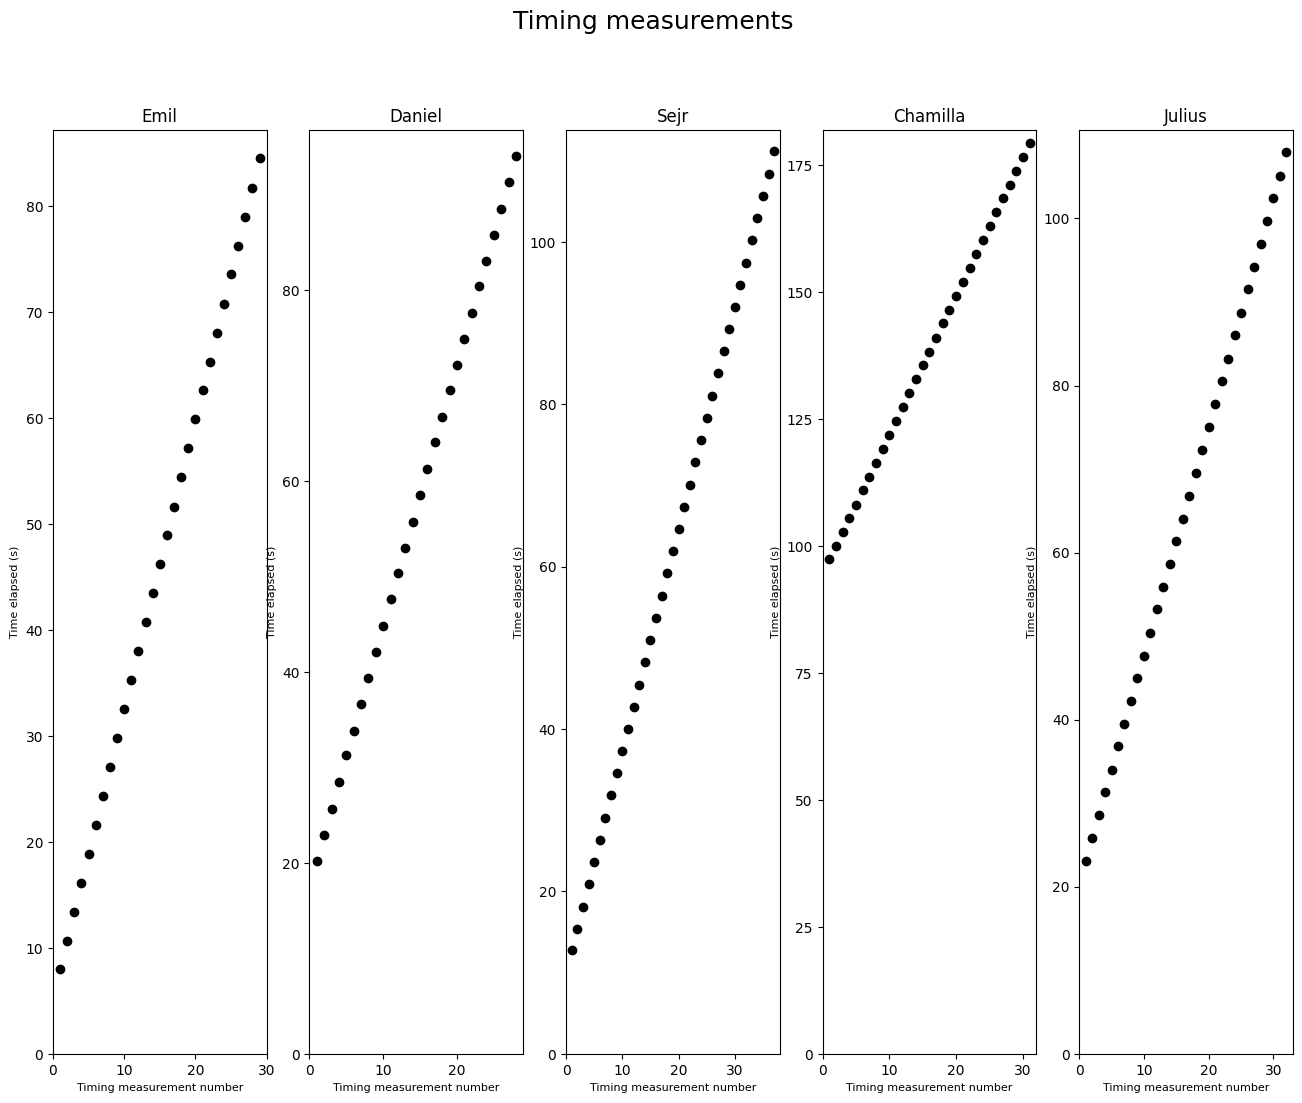

In [19]:
n_list = np.array([n_emil, n_daniel, n_sejr, n_chamilla, n_julius])
t_list = np.array([t_emil, t_daniel, t_sejr, t_chamilla, t_julius])

name_list = ["Emil", "Daniel", "Sejr", "Chamilla", "Julius"]

fig, ax = plt.subplots(ncols = 5, figsize=(16, 12))
fig.suptitle('Timing measurements', fontsize = 18)

for i, (n, t) in enumerate(zip(n_list, t_list)):
    ax[i].errorbar(n, t, yerr = sig_emil, color='k', fmt='o')
    ax[i].set_xlabel('Timing measurement number', fontsize=8)
    ax[i].set_ylabel('Time elapsed (s)', fontsize=8)
    ax[i].set_title(f"{name_list[i]}")
    ax[i].set(xlim = (0, n[-1] + np.ediff1d(n)[0]), ylim = (0, t[-1] + np.ediff1d(t)[0]))

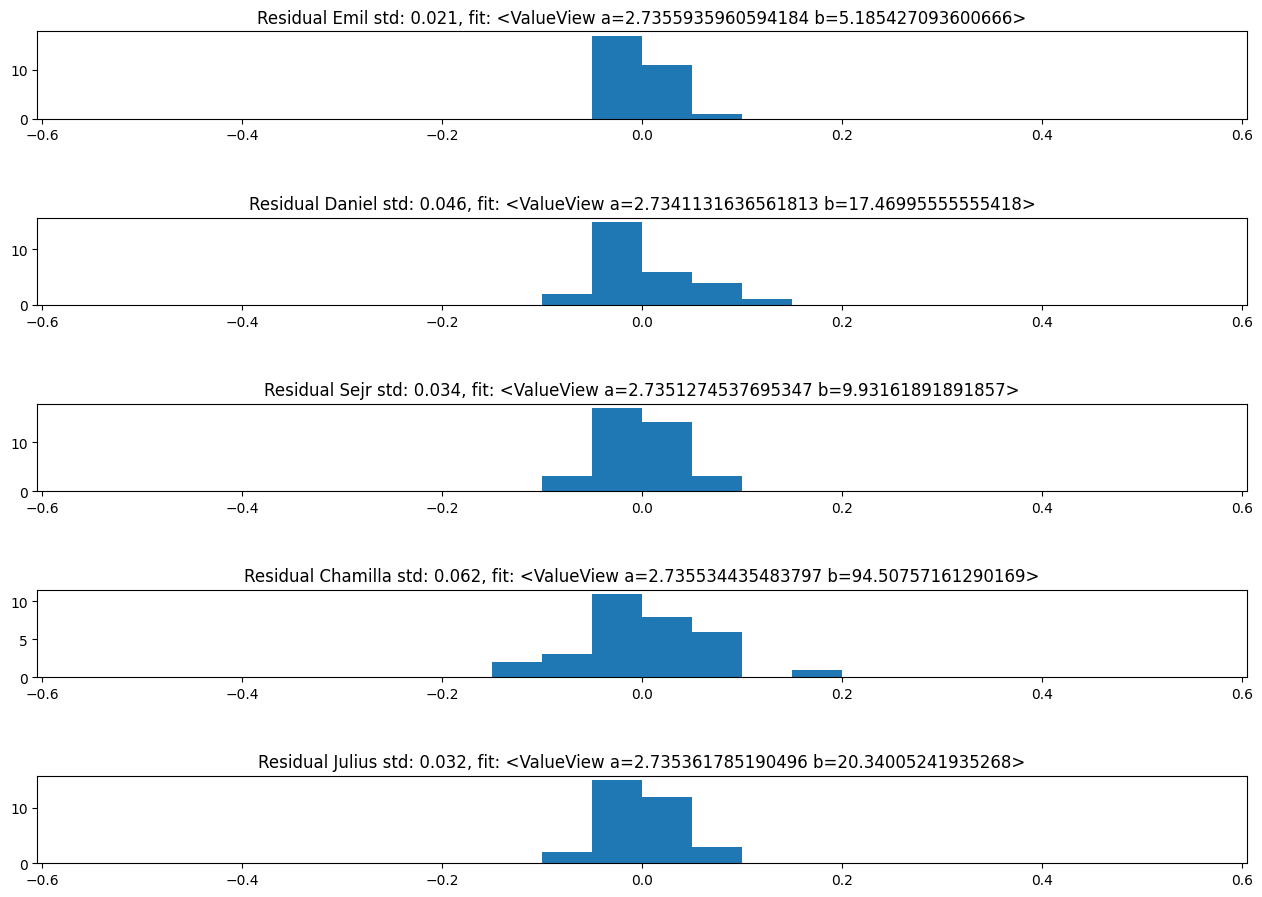

In [25]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize=(14, 10))
fig.tight_layout(pad = 5.0)

def fit(x, a, b):
    return a*x + b

def chi2(a, b):
    y_fit = fit(x, a, b)
    return np.sum(((y - y_fit) / ey)**2)
chi2.errordef = 1.0

for i, (n, t) in enumerate(zip(n_list, t_list)):
    ey = 1
    x = n
    y = t
    minuit = Minuit(chi2, a=0, b=0)
    minuit.migrad()
    y_fit = fit(x, *minuit.values)
    ax[i].hist(y-y_fit, bins=np.arange(-0.55, 0.56, 0.05))
    ax[i].set_title(f"Residual {name_list[i]} std: {(y-y_fit).std():.3f}, fit: {minuit.values}")
plt.show()    

# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.

#fitting all parameters 

for i, (n, t) in enumerate(zip(n_list, t_list, name_list)):
    f"least_squares_{name_list[i]}" = LeastSquares(n, t, sig_list[i])
    #f"m_{name_list[i]}" = Minuit(least_squares, alpha0 = 7, alpha1 = 4)
    #f"m_{name_list[i]}".migard()
print(least_squares_emil)

In [22]:
least_squares_emil = LeastSquares(n_emil, t_emil, sig_emil, linear_fit)
m_emil = Minuit(least_squares_emil, alpha0 = 7, alpha1 = 4)

least_squares_daniel = LeastSquares(n_daniel, t_daniel, sig_daniel, linear_fit)
m_daniel = Minuit(least_squares_daniel, alpha0 = 7, alpha1 = 4)

least_squares_sejr = LeastSquares(n_sejr, t_sejr, sig_sejr, linear_fit)
m_sejr = Minuit(least_squares_sejr, alpha0 = 7, alpha1 = 4)

least_squares_chamilla = LeastSquares(n_chamilla, t_chamilla, sig_chamilla, linear_fit)
m_chamilla = Minuit(least_squares_chamilla, alpha0 = 7, alpha1 = 4)

least_squares_julius = LeastSquares(n_julius, t_julius, sig_julius, linear_fit)
m_julius = Minuit(least_squares_julius, alpha0 = 7, alpha1 = 4)


m_emil.migrad(); 
m_emil.hesse(); 

m_daniel.migrad(); 
m_daniel.hesse(); 

m_sejr.migrad(); 
m_sejr.hesse(); 

m_chamilla.migrad(); 
m_chamilla.hesse(); 

m_julius.migrad(); 
m_julius.hesse();

m_list = [m_emil, m_daniel, m_sejr, m_chamilla, m_julius]

for name in m_list:
    print(*name.values)

5.185427093594685 2.7355935960590365
17.4699555555487 2.734113163655632
9.931618918916415 2.7351274537694215
94.5075716129127 2.7355344354842677
20.340052419342253 2.7353617851895295


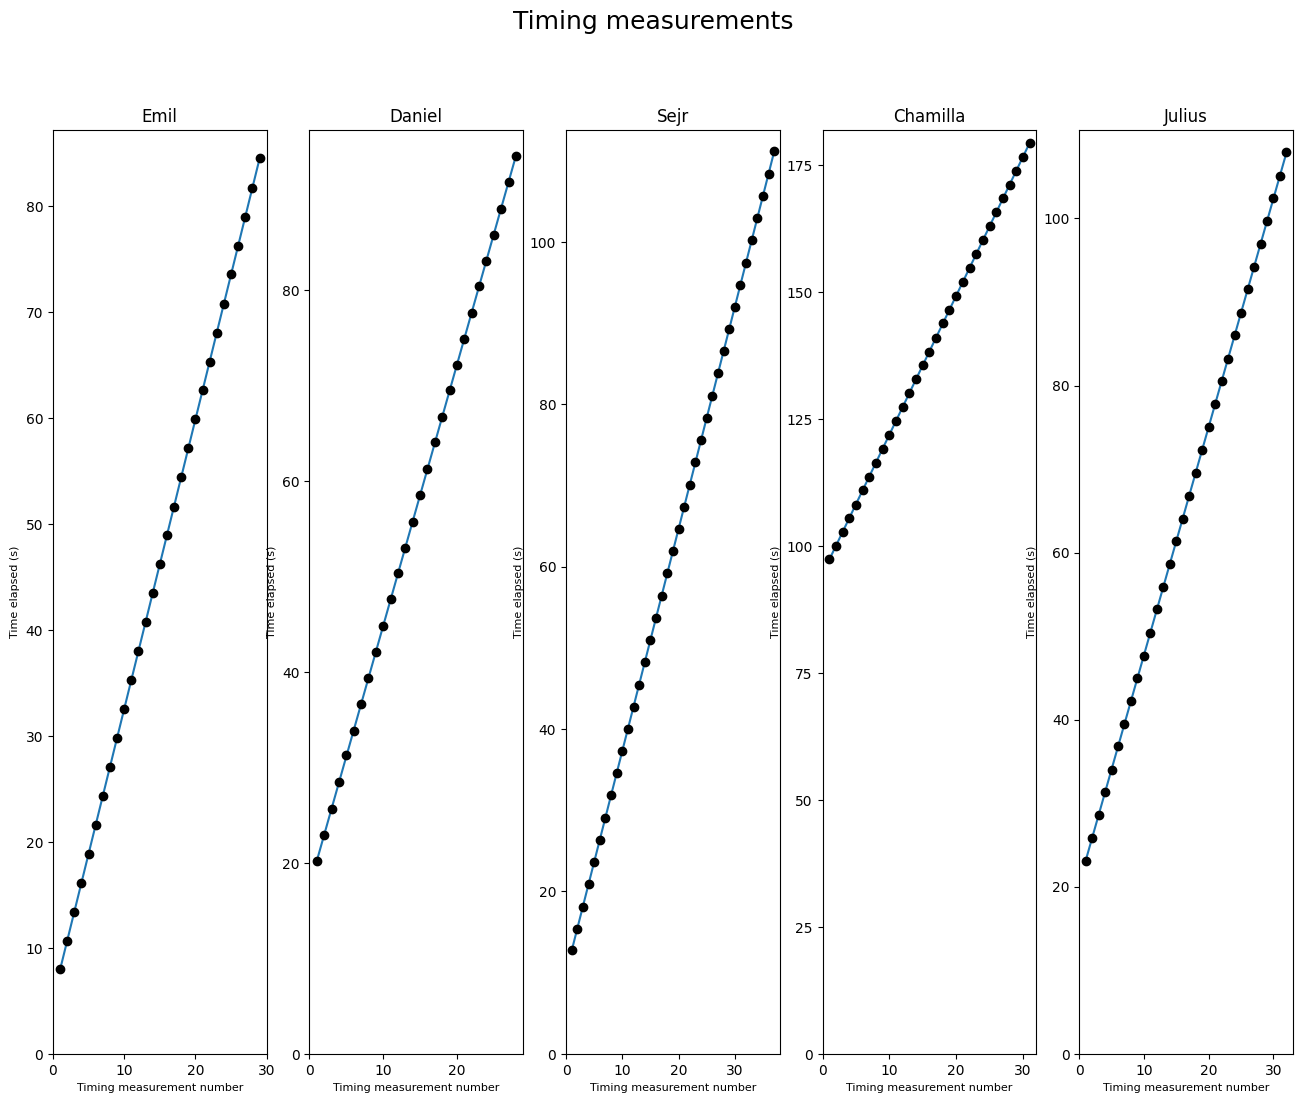

In [23]:
fig, ax = plt.subplots(ncols = 5, figsize=(16, 12))
fig.suptitle('Timing measurements', fontsize = 18)

for i, (n, t, name) in enumerate(zip(n_list, t_list, m_list)):
    ax[i].errorbar(n, t, yerr = sig_emil, color='k', fmt='o')
    ax[i].set_xlabel('Timing measurement number', fontsize=8)
    ax[i].set_ylabel('Time elapsed (s)', fontsize=8)
    ax[i].set_title(f"{name_list[i]}")
    ax[i].set(xlim = (0, n[-1] + np.ediff1d(n)[0]), ylim = (0, t[-1] + np.ediff1d(t)[0]))
    ax[i].plot(n, linear_fit(n, *name.values), label = " linear fit")
plt.show()

NameError: name 'm' is not defined

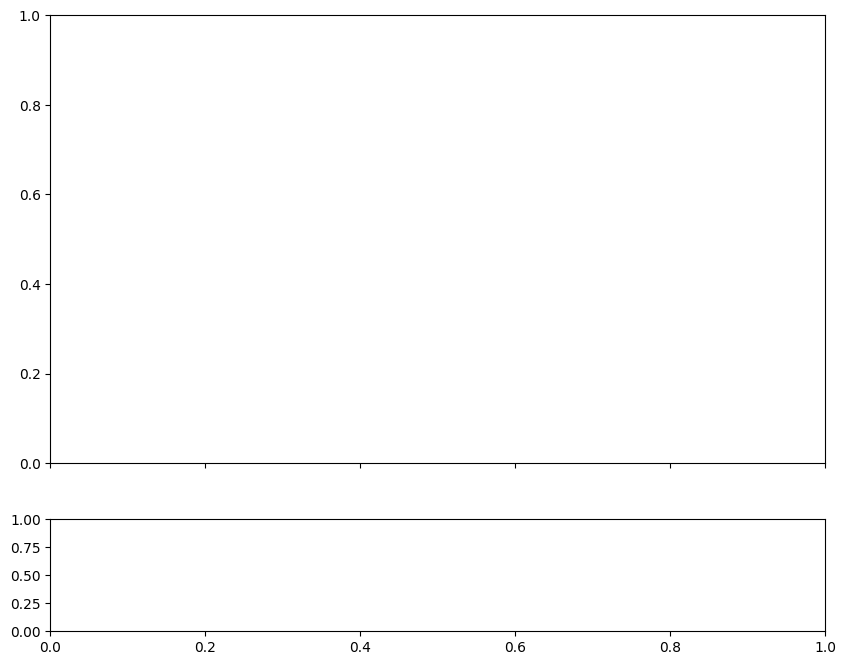

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
print(m.values)
ax[0].errorbar(n_emil, t_emil, yerr = sig_emil, color='k', fmt='o', label = "datapoint emil")
ax[0].plot(n_emil, linear_fit(n_emil, *m.values), label = " linear fit")
ax[0].set_xlabel("n")
ax[0].set_ylabel("t")
ax[0].legend()

# residual 

sns.residplot(ax = ax[1], x = n_emil, y = t_emil,)
ax[1].set_title("Residual")

In [ ]:
alpha0 = m.values["alpha0"]

alpha0_list = ["alpha0_emil", "alpha0_daniel", "alpha0_sejr", "alpha0_chamilla", "alpha0_julius"]
alpha1_list = ["alpha1_emil", "alpha1_daniel", "alpha1_sejr", "alpha1_chamilla", "alpha1_julius"]


for i, (alpha0_name, alpha1_name, name) in enumerate(zip(alpha0_list, alpha1_list, m_list)):
    alpha0_list[i] = name.values["alpha0"]
    alpha1_list[i] = name.values["alpha1"]

In [ ]:
print(alpha0_list)
print(alpha1_list) # alpha1 = period>

[5.18542709359771, 17.469955555545223, 9.931618918917065, 94.50757161290912, 20.340052419363012]
[2.7355935960592253, 2.734113163655324, 2.7351274537694645, 2.735534435484119, 2.735361785191333]


In [ ]:
period_list = ["T_emil", "T_daniel", "T_sejr", "T_chamilla", "T_julius"]

for i, (n, t, T, alpha0) in enumerate(zip(n_list, t_list, period_list, alpha0_list)):
    corrected_t = t - t[0]
    #print(corrected_t)3
    #print(n)
    period_list[i] = corrected_t / n

In [ ]:
#værdierne har lidt et cut omkring 2.7 eller 0, afhængigt af om man trækker den fittede periode fra eller ej. 

period_array = np.array(period_list)
alpha1_array = np.array(alpha1_list)
period_hist = period_array - alpha1_array

#print(period_array)
#print("a",alpha1_array)

(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 3., 4., 8., 9., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-3.  , -2.94, -2.88, -2.82, -2.76, -2.7 , -2.64, -2.58, -2.52,
        -2.46, -2.4 , -2.34, -2.28, -2.22, -2.16, -2.1 , -2.04, -1.98,
        -1.92, -1.86, -1.8 , -1.74, -1.68, -1.62, -1.56, -1.5 , -1.44,
        -1.38, -1.32, -1.26, -1.2 , -1.14, -1.08, -1.02, -0.96, -0.9 ,
        -0.84, -0.78, -0.72, -0.66, -0.6 , -0.54, -0.48, -0.42, -0.36,
        -0.3 , -0.24, -0.18, -0.12, -0.06,  0.  ,  0.06,  0.12,  0.18,
         0.24,  0.3 ,  0.36,  0.42,  0.48,  0.54,  0.6 ,  0.66,  0.72,
         0.78,  0.84,  0.9 ,  0.96,  1.02,  1.08,  1.

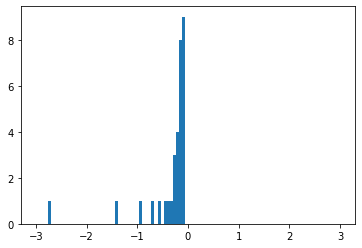

In [ ]:
plt.hist(period_hist[4],bins = 100, range = (-3,3))

In [ ]:
#lav fit med minuit 